In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6834,Kim Bu Youtuber?,FAMILY,NaN,11,9.2M,"1,000+",Free,0,Everyone,Puzzle,"September 9, 2017",1.0,4.0 and up
7351,tutti.ch - Free Classifieds,SHOPPING,4.4,9950,15M,"500,000+",Free,0,Everyone,Shopping,"July 18, 2018",3.7.1,4.1 and up
10537,FK Teplice,SPORTS,NaN,2,26M,50+,Free,0,Everyone,Sports,"March 1, 2018",1.0,4.1 and up
5293,Counter Terrorist Attack,GAME,3.9,145931,43M,"10,000,000+",Free,0,Teen,Action,"May 31, 2018",5.3.2,2.3 and up
9468,Stickman Warriors Heroes 2,GAME,4.4,13714,41M,"1,000,000+",Free,0,Everyone 10+,Action,"April 15, 2017",1.0.4,4.0.3 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Checking if all values in number of Reviews numeric
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df = df.drop(df.index[10472])

In [9]:
df['Reviews'] = df['Reviews'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [11]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [12]:
# Remove all characters from size and convert it to float
df['Size']= df['Size'].str.replace('M',"000")
df['Size']= df['Size'].str.replace('k','')
df['Size']= df['Size'].replace('Varies with device', np.nan)
df['Size']= df['Size'].astype('float')

In [13]:
# Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i<10:
        df['Size']= df['Size'].replace(i,i*1000)
df['Size'] = df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [15]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# Remove unwanted characters from Price and Installs columns
items_to_remove =['$','+',',']
cols_to_clean = ['Price', 'Installs']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col] = df[col].str.replace(item,'')
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4697,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,NaN,2,17.0,50,Paid,9.99,Everyone,Auto & Vehicles,"June 25, 2018",3.0.0,4.0 and up
6315,BJ-FPV,FAMILY,4.2,16,26.0,1000,Free,0,Everyone,Casual,"July 31, 2018",2.0.2,4.4 and up
6695,BR Classified,BUSINESS,NaN,0,28.0,50,Free,0,Everyone,Business,"August 30, 2017",1.0,4.2 and up
5770,AirWatch Inbox,BUSINESS,2.7,8346,NaN,1000000,Free,0,Everyone,Business,"September 20, 2017",Varies with device,4.0 and up
4492,The Q - Live Trivia Game Network,GAME,2.7,1486,14.0,100000,Free,0,Everyone,Trivia,"August 3, 2018",2.4.8,5.0 and up
10706,Neon Blue Gaming Wallpaper&Theme fo Lenovo K8 ...,BUSINESS,4.6,7,2.0,500,Free,0,Everyone,Business,"August 24, 2017",1.0.0,2.3.3 and up
3469,ES File Explorer File Manager,PRODUCTIVITY,4.6,5383985,16.0,100000000,Free,0,Everyone,Productivity,"August 3, 2018",4.1.8.2.2,4.0 and up
4700,Mike V: Skateboard Party PRO,SPORTS,4.2,2506,NaN,50000,Paid,3.99,Everyone,Sports,"January 23, 2017",Varies with device,Varies with device
3895,Adobe Acrobat Reader,PRODUCTIVITY,4.3,3014548,NaN,100000000,Free,0,Everyone,Productivity,"April 17, 2018",Varies with device,Varies with device
10376,Moto Fighter 3D,GAME,3.9,85410,39.0,10000000,Free,0,Everyone 10+,Racing,"September 20, 2017",20170920,4.1 and up


In [18]:
df['Installs'] = df['Installs'].astype('float')
df['Price'] = df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int32(1), object(8)
memory usage: 1.1+ MB


In [19]:
# Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [20]:
# Extracting new columns Updated Year, Updated Month and drop Last Updateded column 
df['Updated Month']= df['Last Updated'].dt.month
df['Updated Year']= df['Last Updated'].dt.year
df.drop('Last Updated', axis= 1, inplace = True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated Month,Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [22]:
null = pd.DataFrame({'Null Values': df.isna().sum().sort_values(ascending = False), 
                     'Percentage Null Values': (df.isna().sum().sort_values(ascending=False))/(df.shape[0])*(100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [23]:
def impute_median(series):
    return series.fillna(series.median())

In [24]:
df['Rating'] = df['Rating'].transform(impute_median)
df['Size'] = df['Size'].transform(impute_median)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated Month   10840 non-null  int32  
 13  Updated Year    10840 non-null  int32  
dtypes: float64(4), int32(3), object(7)
memory usage: 1.1+ MB


In [26]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [27]:
df.drop_duplicates(inplace=True)
duplicate = df.duplicated()
print(duplicate.sum())

0


In [28]:
num_features = [col for col in df.columns if df[col].dtype!= 'O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated Month',
 'Updated Year']

In [29]:
cat_features=[col for col in df.columns if df[col].dtype =='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

<Axes: >

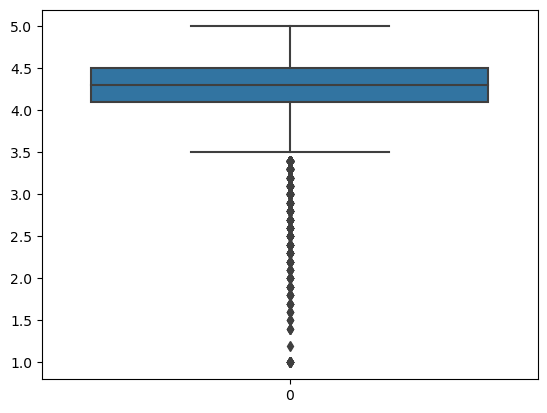

In [30]:
sns.boxplot(df["Rating"])

<Axes: >

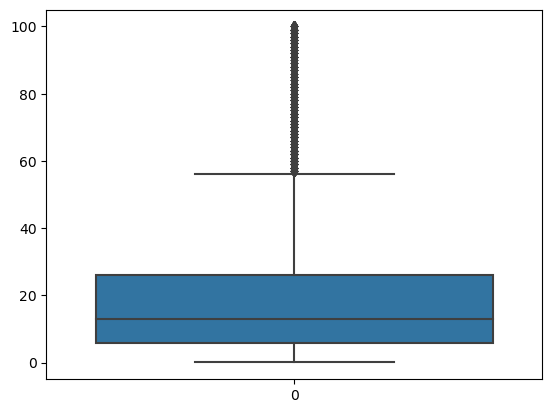

In [31]:
sns.boxplot(df["Size"])

<Axes: >

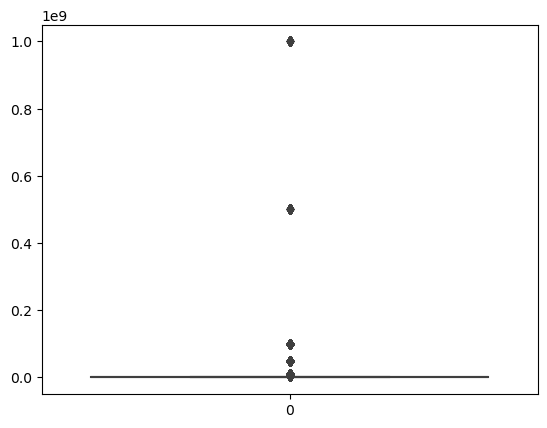

In [32]:
sns.boxplot(df["Installs"])

<Axes: >

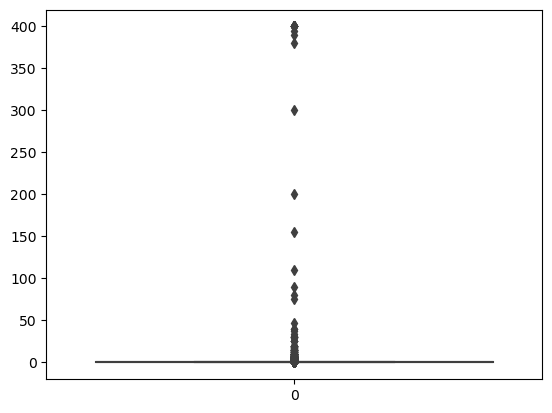

In [33]:
sns.boxplot(df["Price"])

In [34]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

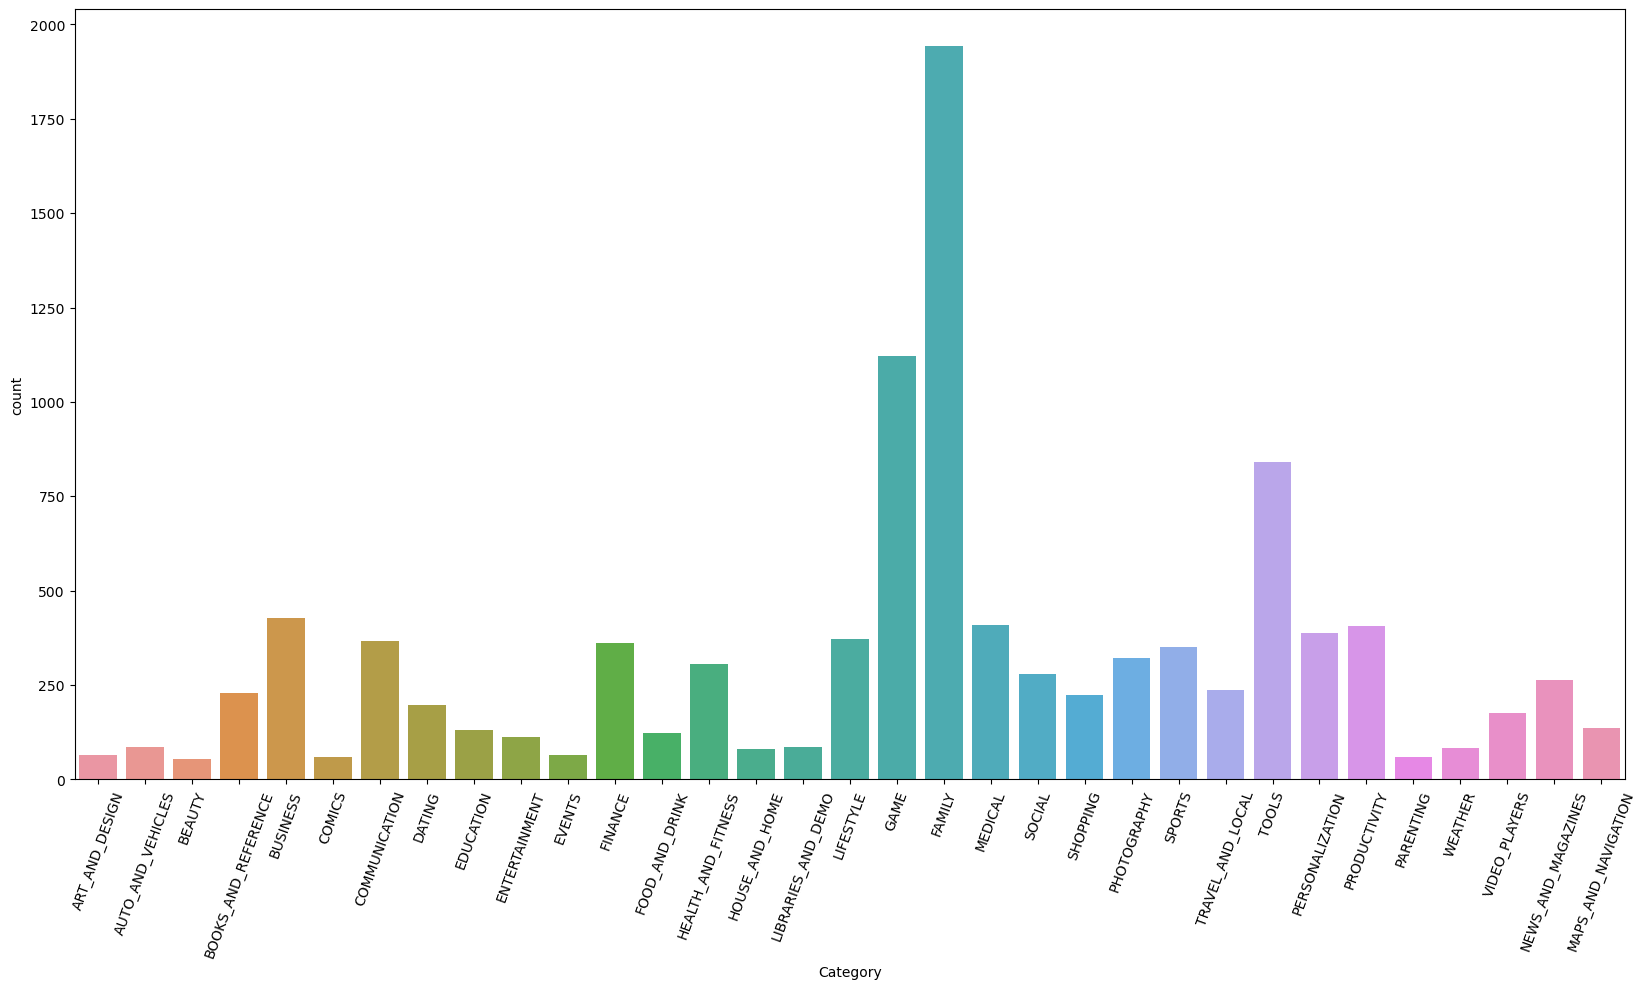

In [35]:
plt.rcParams['figure.figsize']= (20, 10)
sns.countplot(x='Category', data=df)
plt.xticks(rotation= 70)

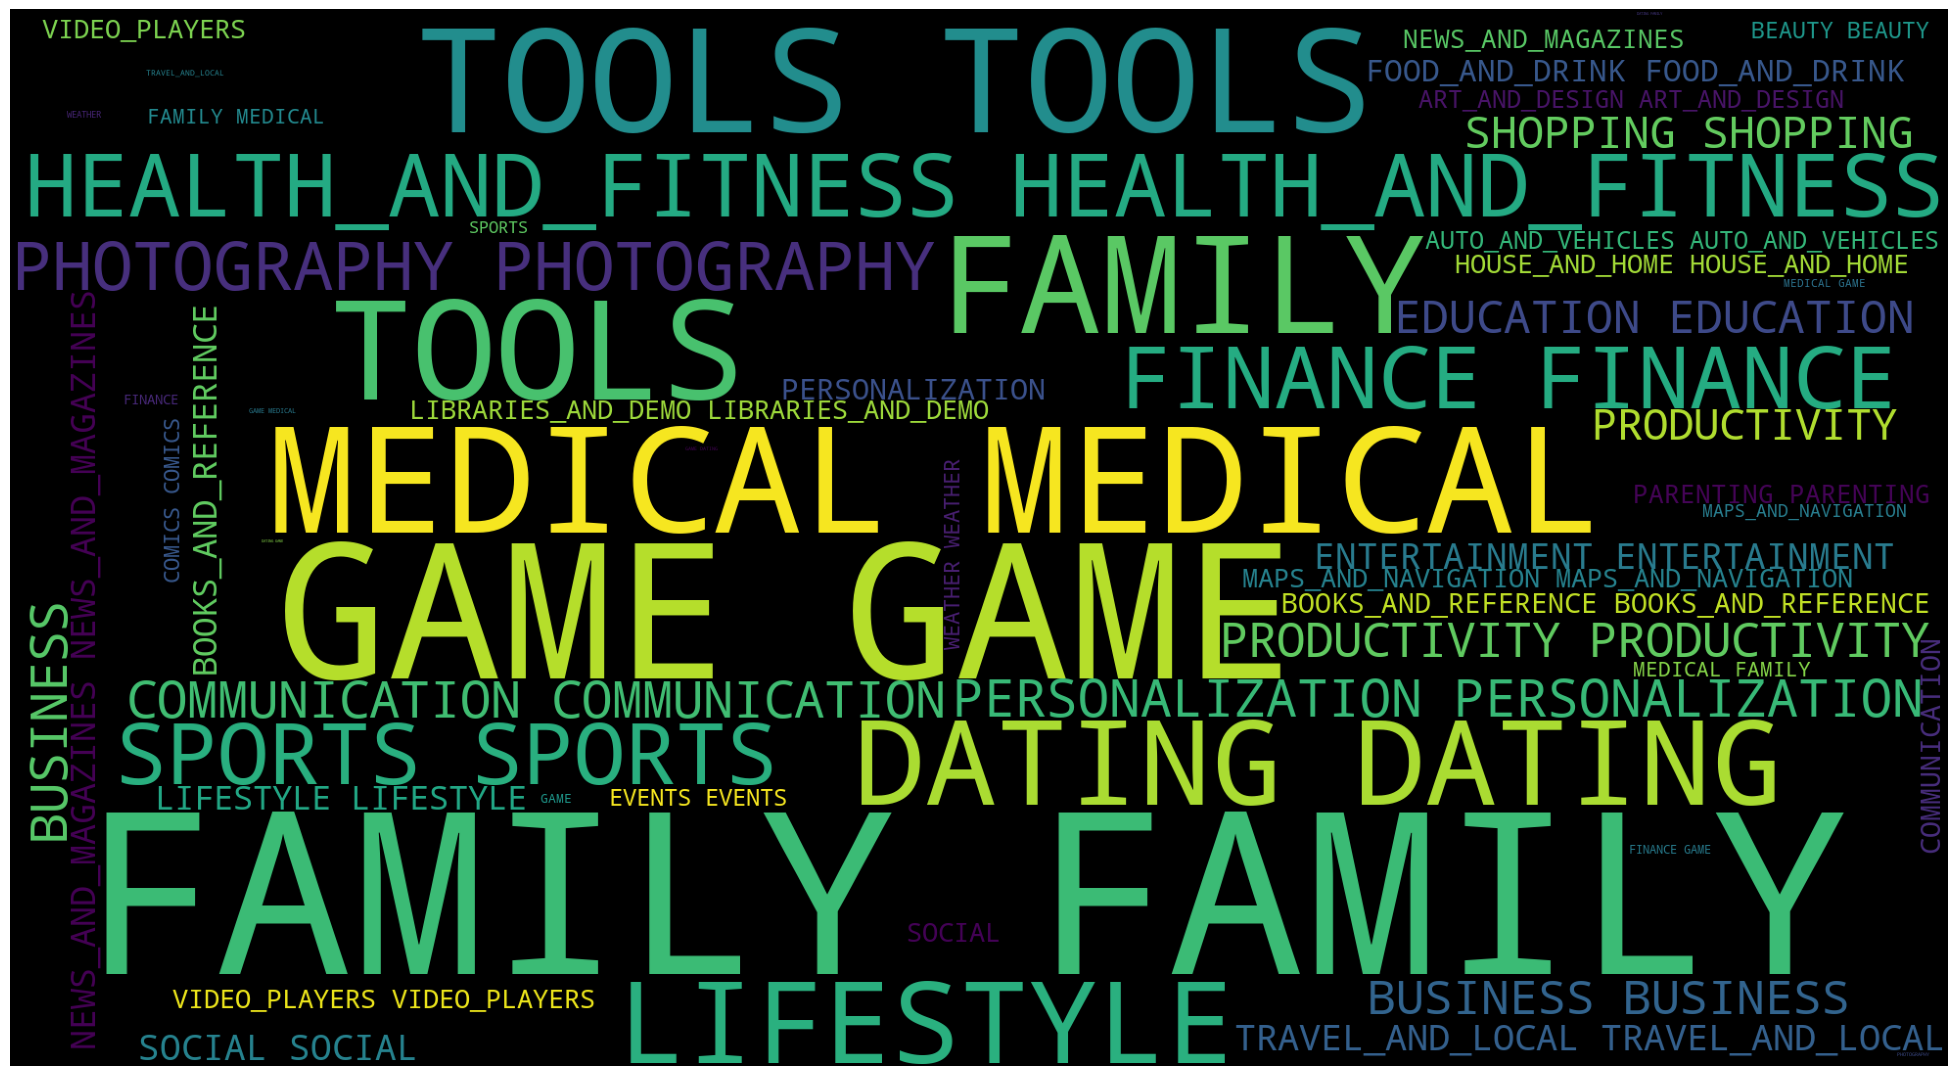

In [36]:
plt.subplots(figsize= (25, 20))
wordcloud = WordCloud(background_color= 'black',
                     width= 1980,
                     height= 1080).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'HEALTH_AND_FITNESS'),
  Text(2, 0, 'SHOPPING'),
  Text(3, 0, 'LIFESTYLE'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'COMMUNICATION'),
  Text(6, 0, 'ART_AND_DESIGN'),
  Text(7, 0, 'COMICS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'GAME'),
  Text(10, 0, 'MEDICAL'),
  Text(11, 0, 'BUSINESS'),
  Text(12, 0, 'PRODUCTIVITY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'PHOTOGRAPHY'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'FOOD_AND_DRINK'),
  Text(20, 0, 'PARENTING'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'TRAVEL_AND_LOCAL'),
  Text(23, 0, 'DATING'),
  Text(24, 0, 'LIBRARIES_AND_DEMO'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, 'EDUCATION'),
  Text(28, 0, 'AUTO_AND_VE

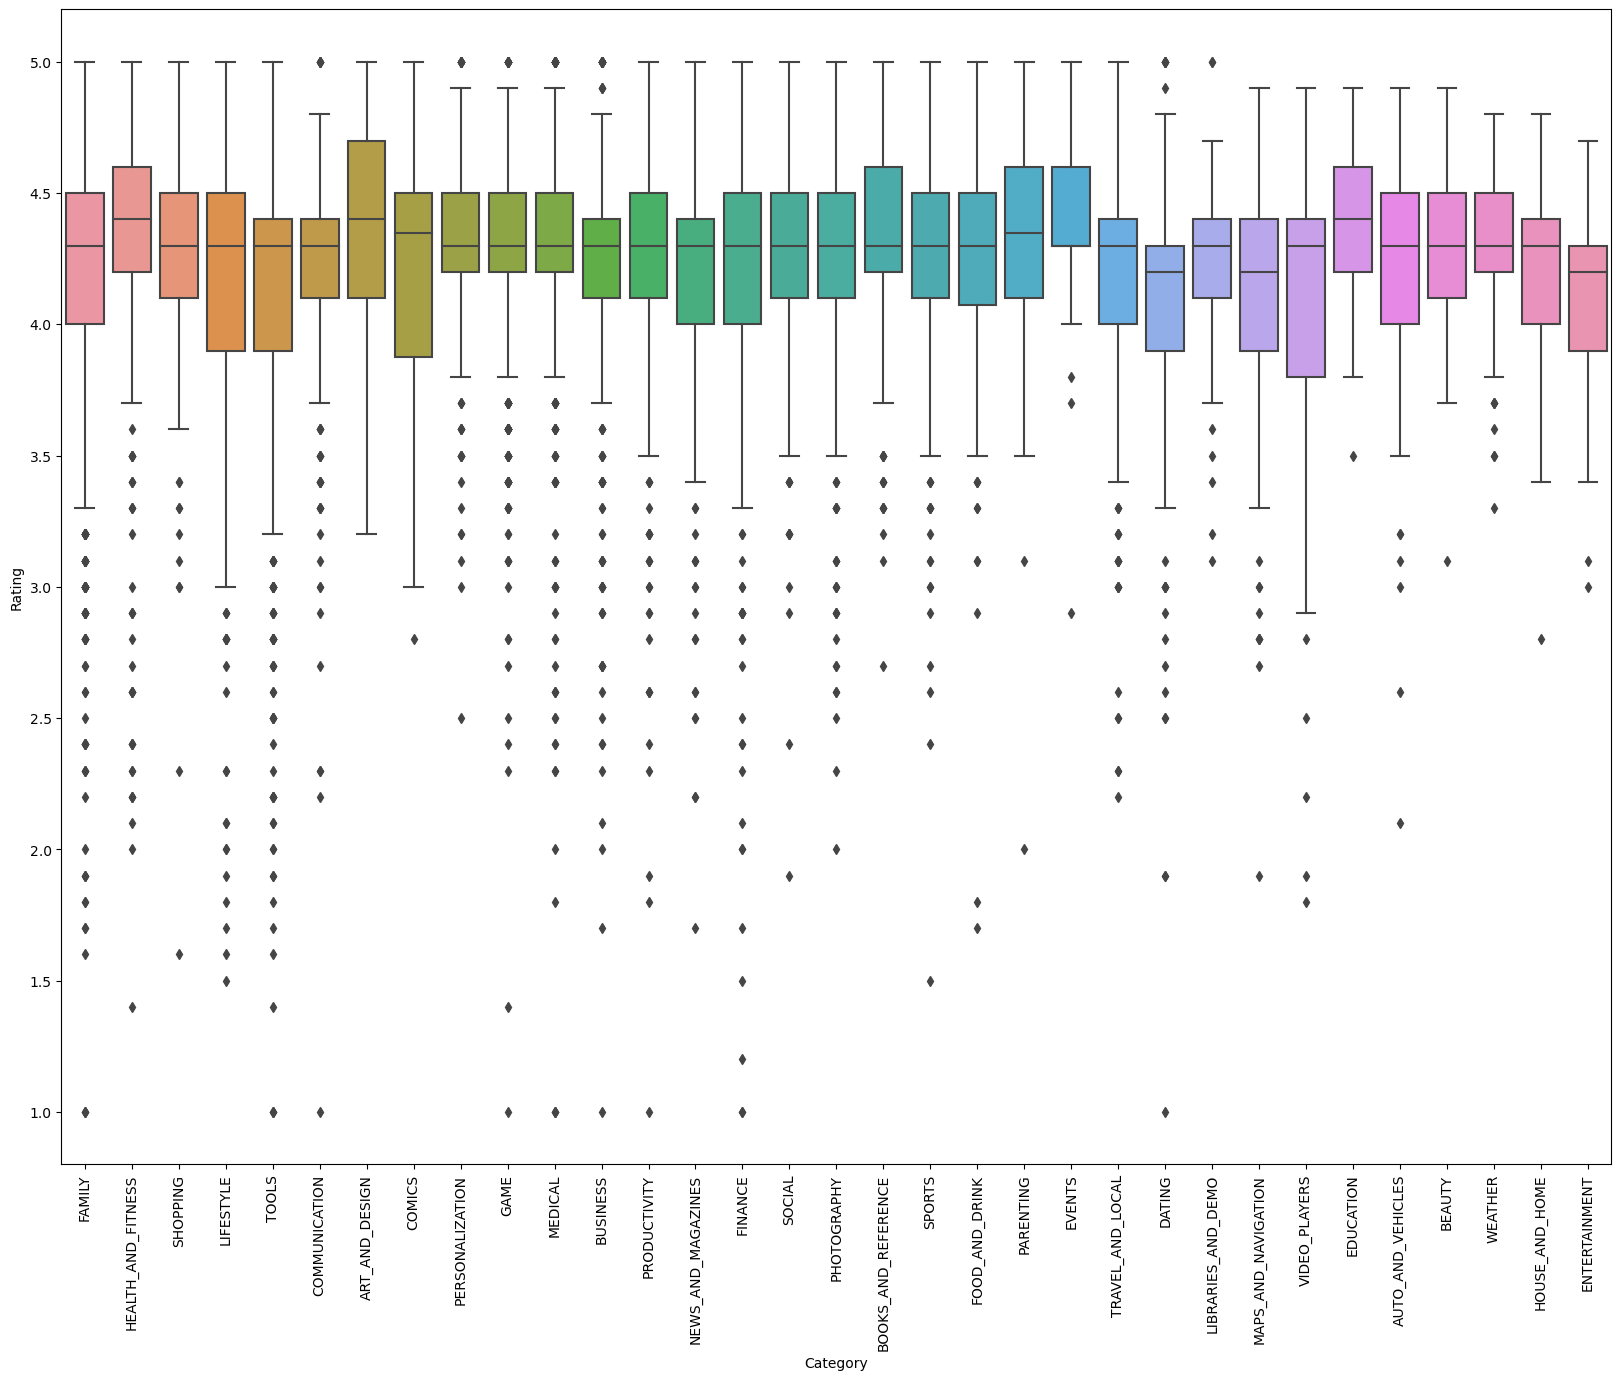

In [37]:
plt.figure(figsize=(20,15))
sns.boxplot(x= 'Category', y= 'Rating', data= df.sort_values('Rating', ascending= False))
plt.xticks(rotation= 90)

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

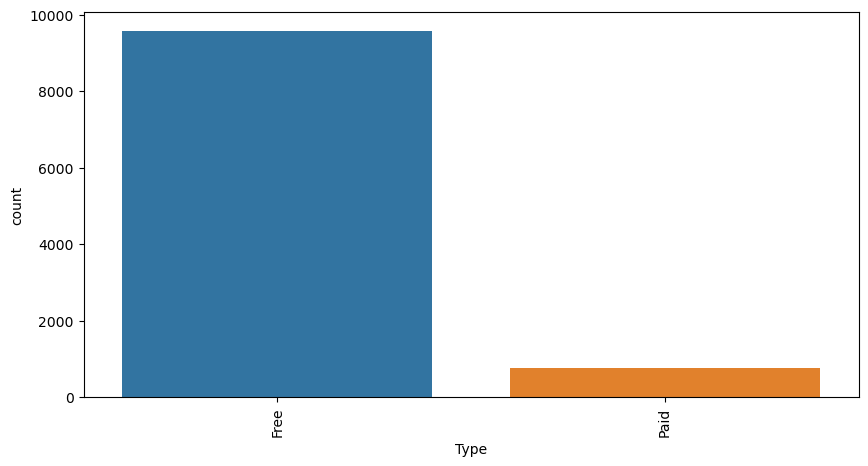

In [38]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(x='Type', data= df)
plt.xticks(rotation=90)

<Axes: ylabel='count'>

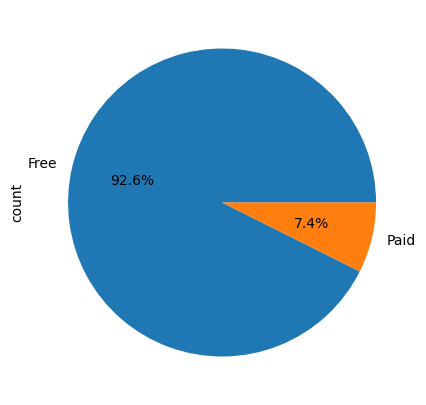

In [39]:
df['Type'].value_counts().plot.pie(autopct= "%1.1f%%")

<Figure size 1500x1000 with 0 Axes>

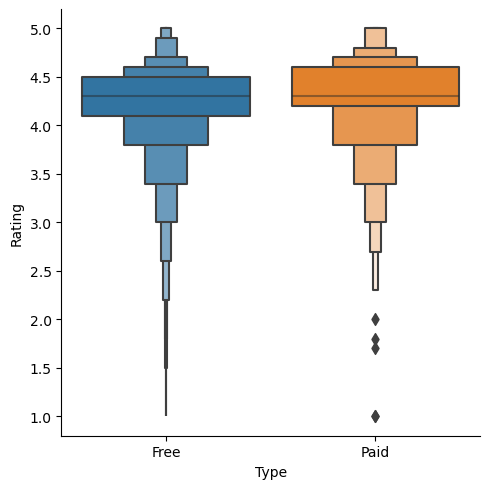

In [40]:
plt.figure(figsize= (15, 10))
sns.catplot(x= 'Type', y= 'Rating', data= df.sort_values('Rating', ascending= False), kind= 'boxen')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

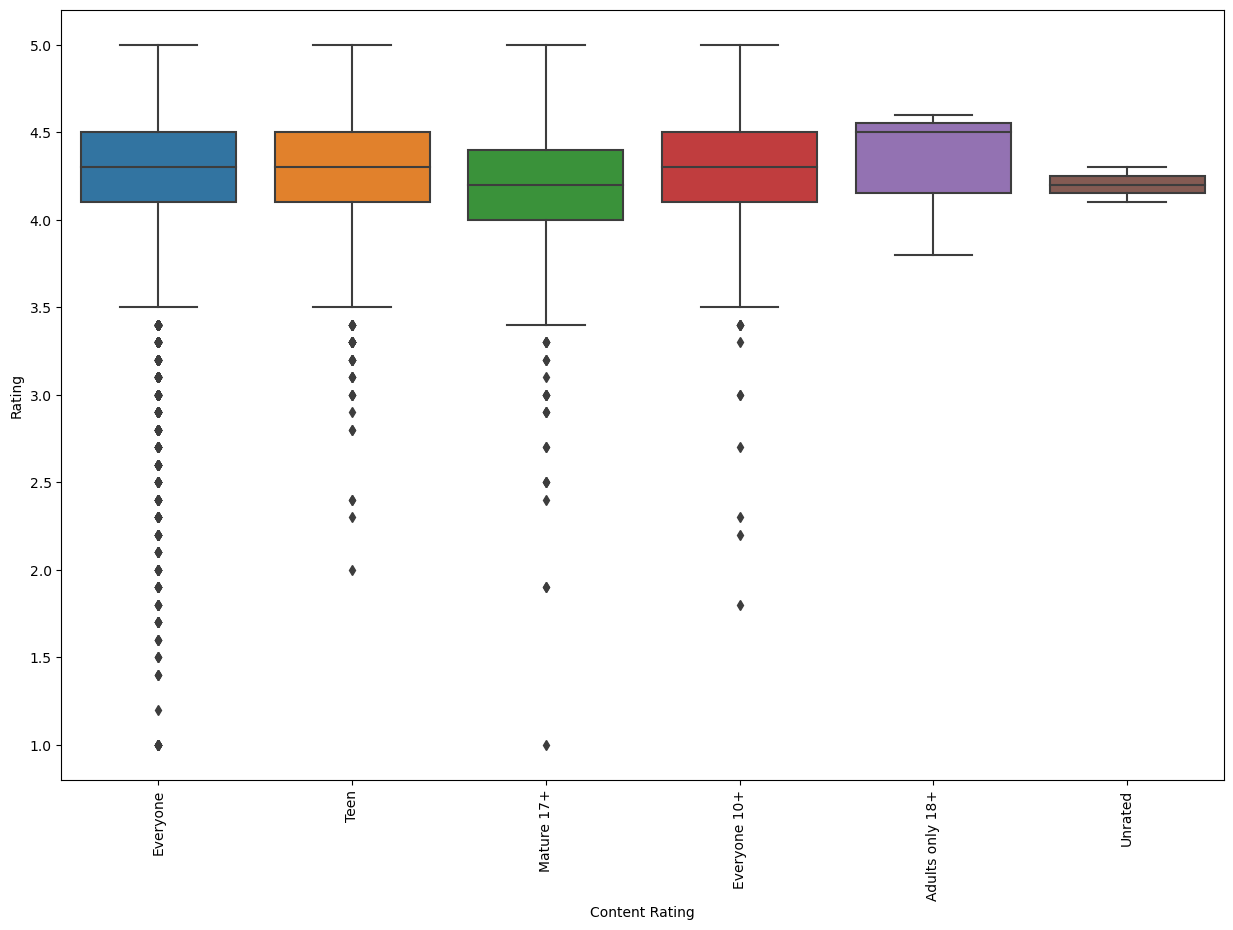

In [41]:
plt.figure(figsize= (15,10))
sns.boxplot(x= 'Content Rating', y= 'Rating', data= df.sort_values('Rating', ascending= False))
plt.xticks(rotation= 90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

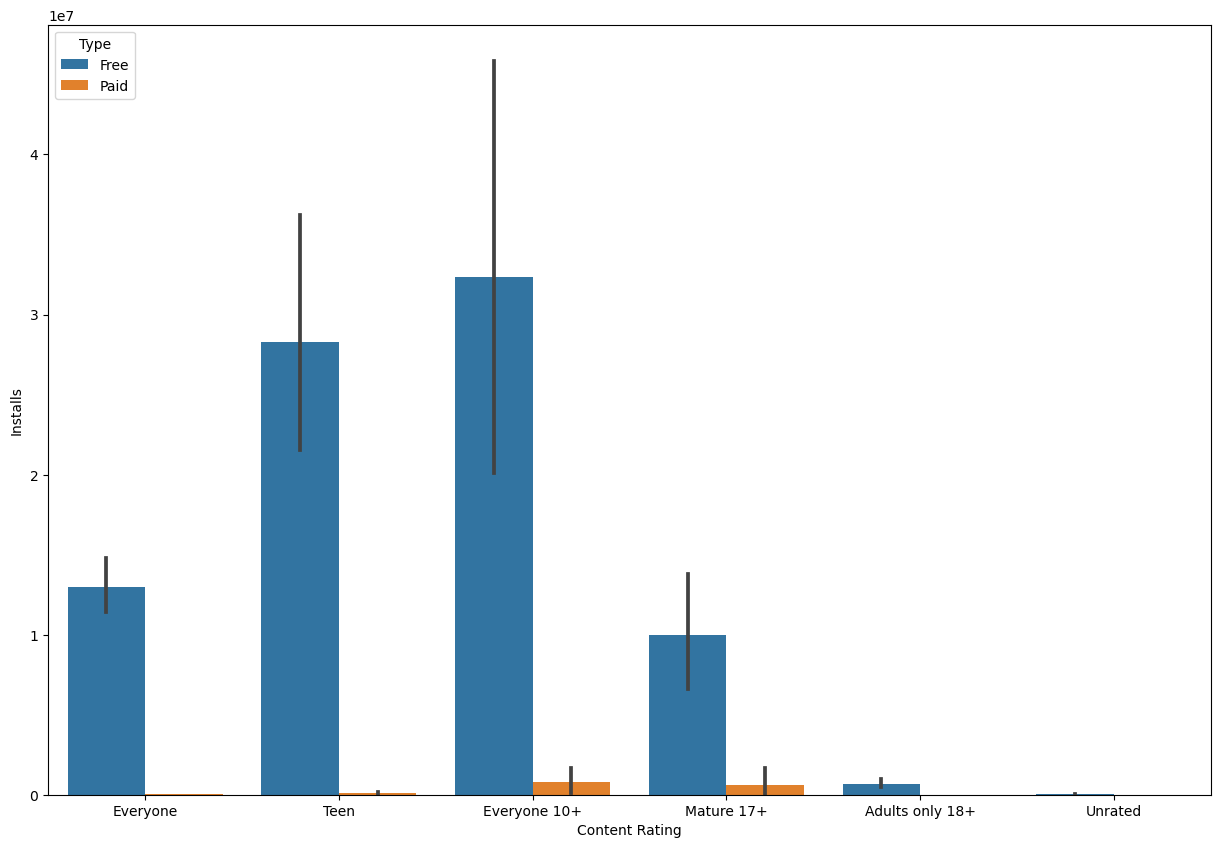

In [42]:
plt.figure(figsize= (15,10))
sns.barplot(x= 'Content Rating', y= 'Installs', hue= 'Type', data= df)

In [43]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

In [44]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [45]:
# Function to create a scatter plot
def scatter_plot(col1, col2):
    plt.figure(figsize= (10,5))
    sns.scatterplot(x= col1, y= col2, hue= 'Type', data=df)
    plt.title(f'Scatter plot of {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


# Function to create a KDE plot
def kde_plot(feature):
    grid= sns.FacetGrid(df, hue= 'Type', aspect= 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()


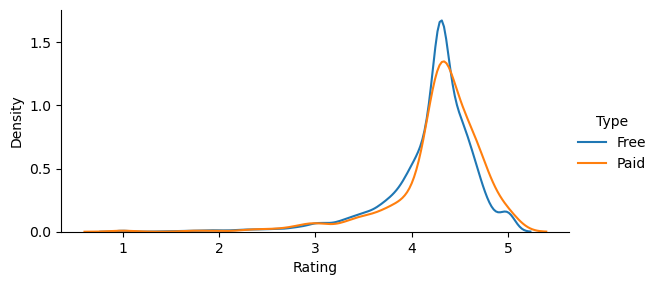

In [46]:
kde_plot('Rating')

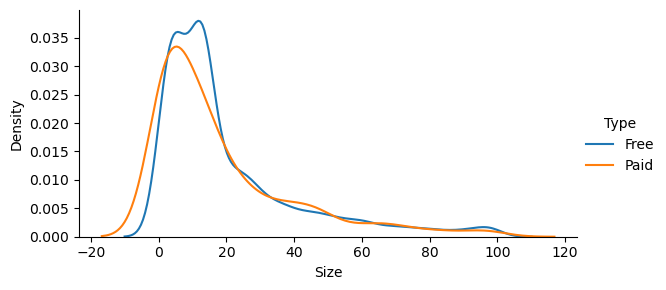

In [47]:
kde_plot('Size')

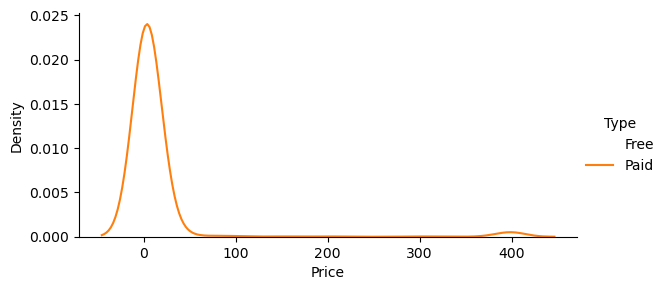

In [48]:
kde_plot('Price')

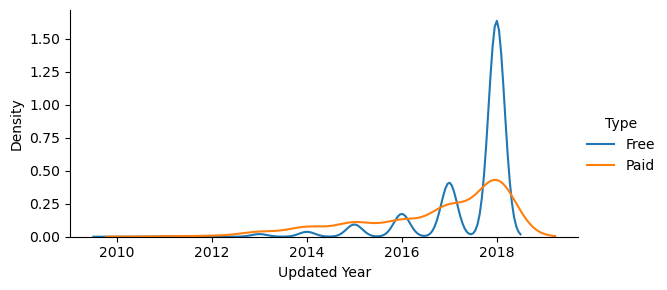

In [49]:
kde_plot('Updated Year')

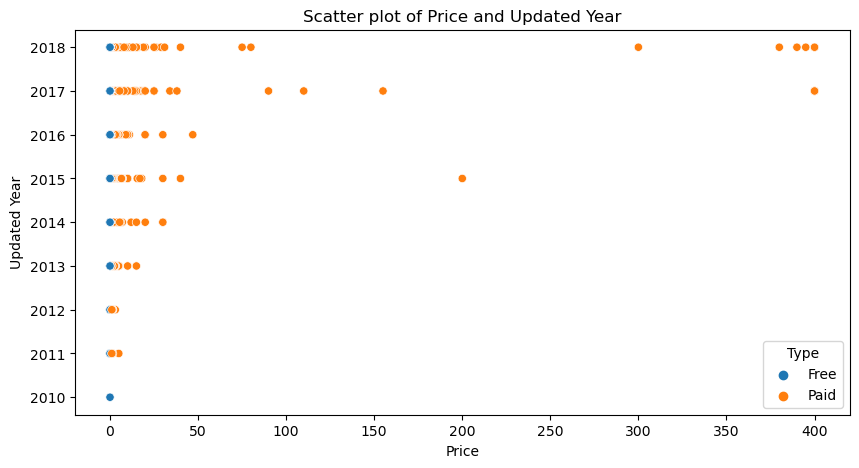

In [50]:
scatter_plot('Price', 'Updated Year')

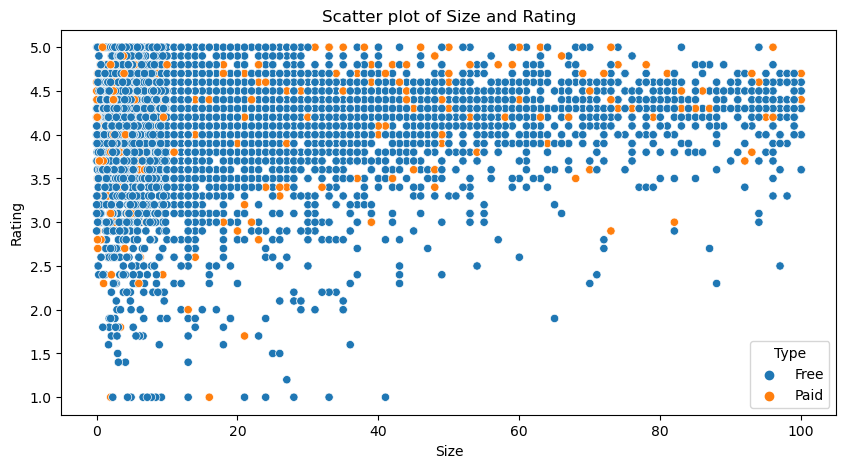

In [51]:
scatter_plot('Size', 'Rating')

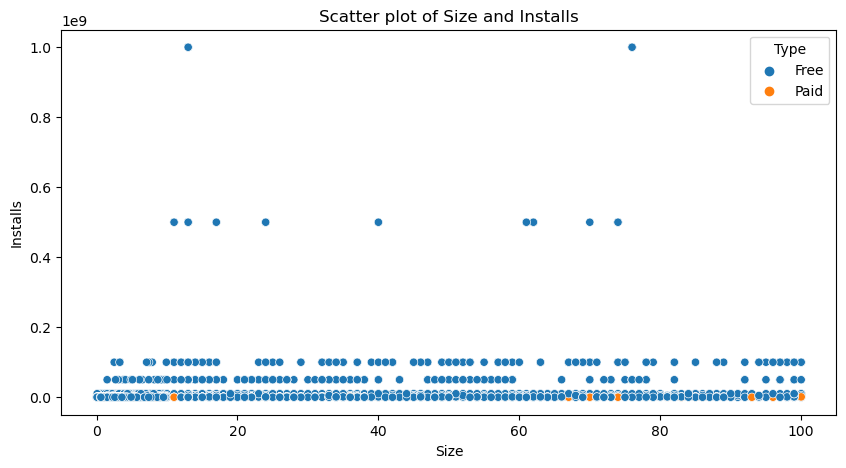

In [52]:
scatter_plot('Size', 'Installs')

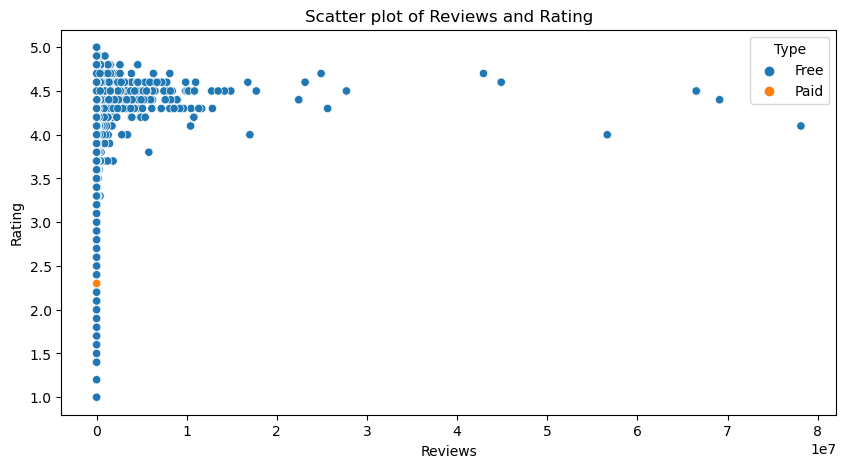

In [53]:
scatter_plot('Reviews', 'Rating')

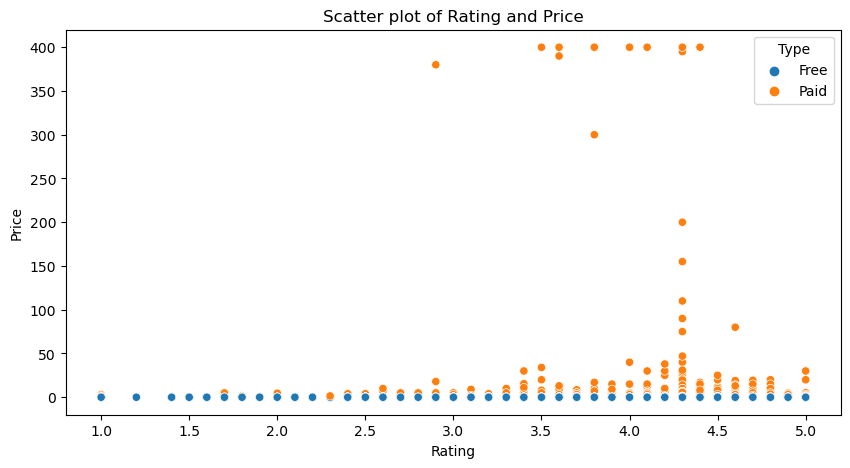

In [54]:
scatter_plot('Rating', 'Price')

In [55]:
df_rating5 = df[df.Rating == 5]
print(f'There are {df_rating5.shape[0]} apps with rating 5')

There are 271 apps with rating 5


Text(0.5, 1.0, 'Distribution of Installs in 5.0 rating apps')

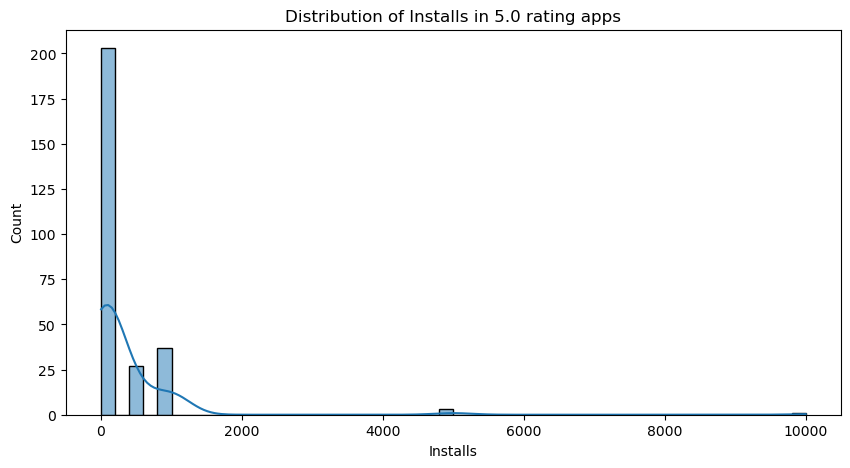

In [56]:
sns.histplot(data= df_rating5, x= 'Installs', kde= True, bins= 50)
plt.title('Distribution of Installs in 5.0 rating apps')

Despite the full ratings, the number of installations for the majority of the apps is low. Hence, those apps cannot be considered the best products.


Text(0.5, 1.0, 'Distribution of Reviews of 5.0 rating apps')

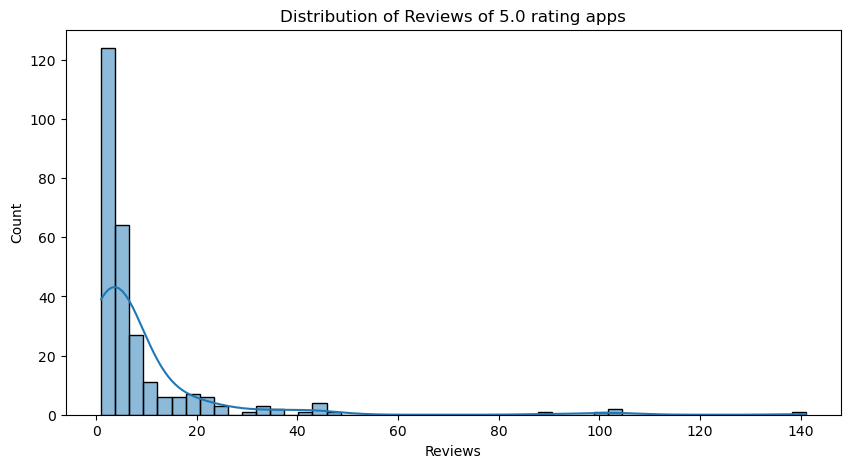

In [57]:
sns.histplot(data = df_rating5, x='Reviews', kde= True, bins=50)
plt.title('Distribution of Reviews of 5.0 rating apps')

The distribution is right-skewed which shows applications with few reviews having 5.0 ratings

In [58]:
df_rating5_cat = df_rating5['Category'].value_counts().reset_index()
df_rating5_cat

,Category,count
0,FAMILY,67
1,LIFESTYLE,29
2,MEDICAL,25
3,BUSINESS,18
4,TOOLS,17
5,GAME,12
6,HEALTH_AND_FITNESS,12
7,PERSONALIZATION,10
8,SOCIAL,8
9,PRODUCTIVITY,8


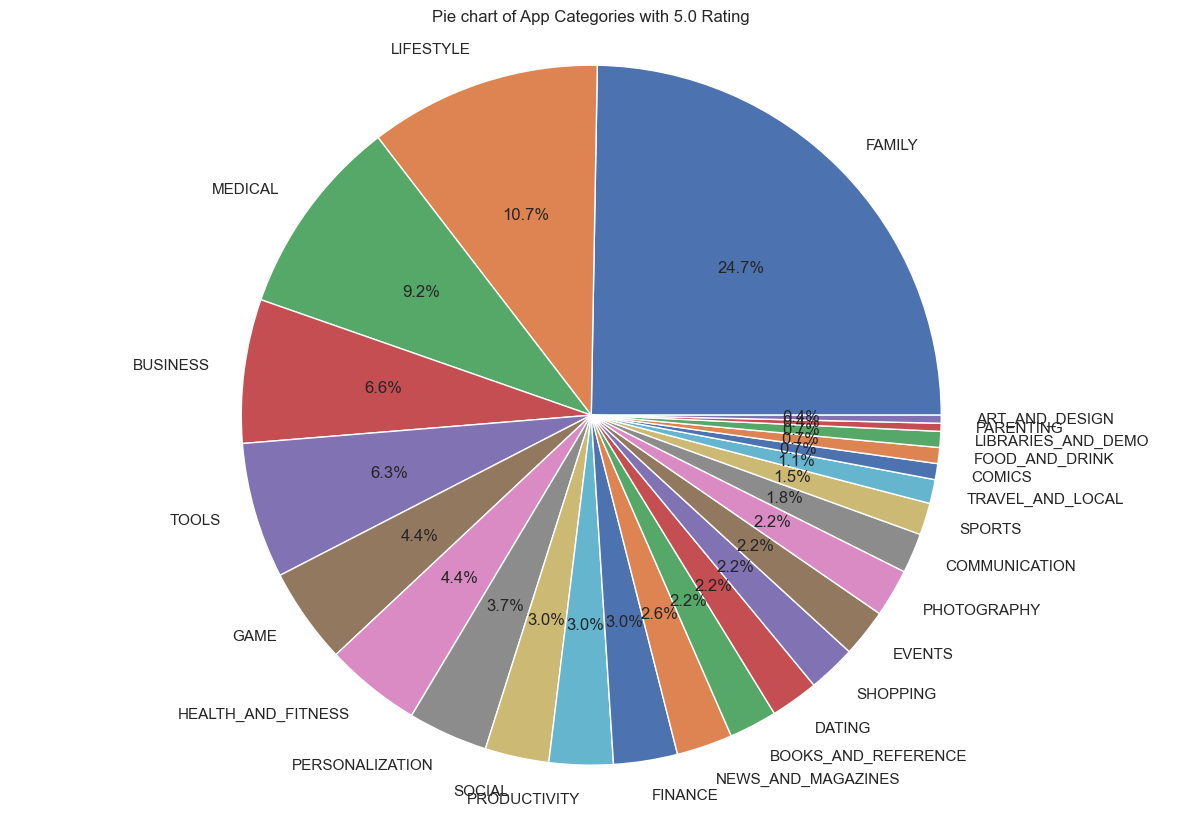

In [59]:
plt.figure(figsize= (15,10))
sns.set(style= 'whitegrid')
plt.pie(df_rating5_cat.iloc[:, 1], labels= df_rating5_cat.iloc[:, 0], autopct= "%1.1f%%")
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Family, LifeStyle and Medical apps receive the most 5.0 ratings on Google Play Store with Family representing about quater of whole.

In [60]:
df_rating5_type = df['Type'].value_counts().reset_index()

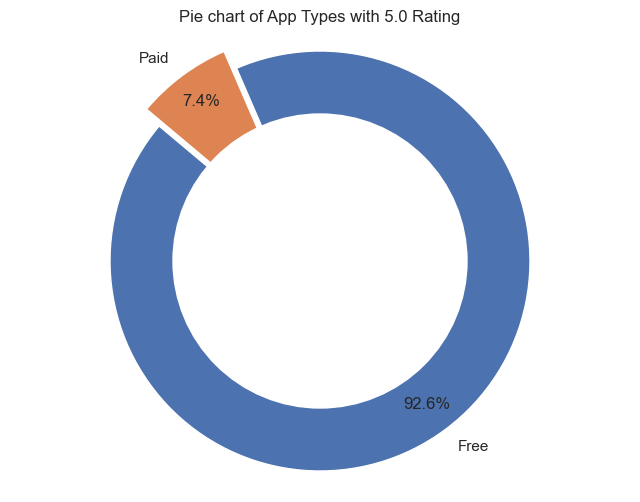

In [61]:
plt.figure(figsize=(8, 6))
sns.set(style= 'whitegrid')
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance
plt.pie(df_rating5_type.iloc[:, 1], labels= df_rating5_type.iloc[:, 0],autopct = '%1.1f%%', pctdistance = 0.85, startangle= 140, explode= explode)

centre_circle = plt.Circle((0,0), 0.70, fc= 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Pie chart of App Types with 5.0 Rating')
plt.show()

Almost 90% of the 5.0 rating apps are free on Goolge Play Store.

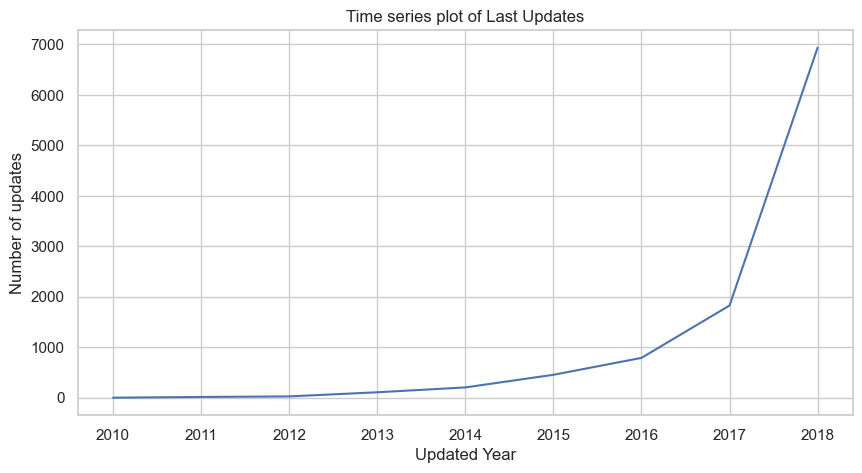

In [62]:
freq = pd.Series()
freq = df['Updated Year'].value_counts()
freq.plot()
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")
plt.show()

We decide to prune the following features:

App : App names are of no value for the model
Genres : The informations it stores is same as the feature Category
Current Ver : Current Version of an app doesn't hold significant value.
Android Ver: Android Version of an app doesn't hold significant value.

In [63]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

In [64]:
target = 'Rating'

In [65]:
X = df.copy().drop(pruned_features+ [target], axis= 1)
y = df.copy()[target]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [67]:
le_dict = defaultdict()

In [68]:
features_to_encode = X_train.select_dtypes(include = ['category', 'object']).columns

for col in features_to_encode:
    le= LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas
    
    X_test[col] = le.transform(X_test[col])
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas
    le_dict[col] = le # Saving the label encoder for individual features


In [69]:
categorical_features = features_to_encode + ['Updated Month']
X_train['Updated Month'] = X_train['Updated Month'].astype('category')
X_test['Updated Month'] = X_test['Updated Month'].astype('category')

numeric_features = X_train.select_dtypes(exclude = ['category', 'object']).columns

In [70]:
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [71]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [74]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE']= mean_squared_error(y_train, y_train_pred, squared =False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared= False)

In [75]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [76]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [77]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared =False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared= False)

In [78]:
rf = RandomForestRegressor(max_depth = 2, random_state = 0)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [79]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [80]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared= False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared = False)

In [81]:
df_metrics_reg

value
model         dataset metric          
Linear        train   RMSE    0.478223
                      MAE     0.318535
                      R2      0.023226
              test    RMSE    0.483279
                      MAE     0.326983
                      R2      0.036713
KNN           train   RMSE    0.408996
                      MAE      0.27951
                      R2      0.285549
              test    RMSE    0.509932
                      MAE     0.349488
                      R2      -0.07247
Random Forest train   RMSE    0.468364
                      MAE     0.308973
                      R2      0.063083
              test    RMSE     0.47216
                      MAE      0.31434
                      R2      0.080528

In [82]:
df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v : round(v, ndigits= 3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.478
                      MAE     0.319
                      R2      0.023
              test    RMSE    0.483
                      MAE     0.327
                      R2      0.037
KNN           train   RMSE    0.409
                      MAE     0.280
                      R2      0.286
              test    RMSE    0.510
                      MAE     0.349
                      R2     -0.072
Random Forest train   RMSE    0.468
                      MAE     0.309
                      R2      0.063
              test    RMSE    0.472
                      MAE     0.314
                      R2      0.081

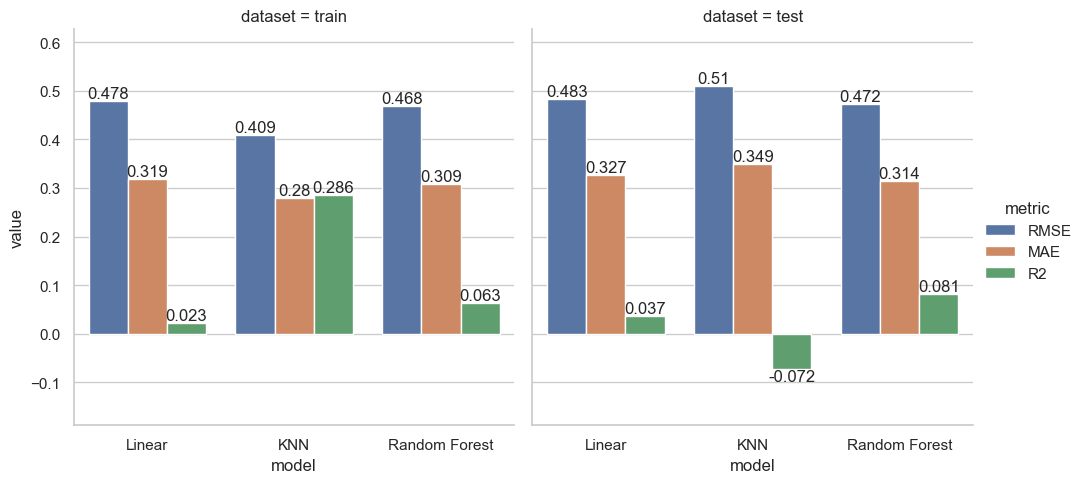

In [83]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

The Regression predictions don't hold up very well!

We can interpret that the dataset is not suitable for regression problem.

In [84]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [85]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [86]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

In [87]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [88]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

In [89]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [90]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

In [91]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [92]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

In [93]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         78.96
                    test          76.93
KNN                 train         80.98
                    test          74.52
Random Forest       train        100.00
                    test          77.46

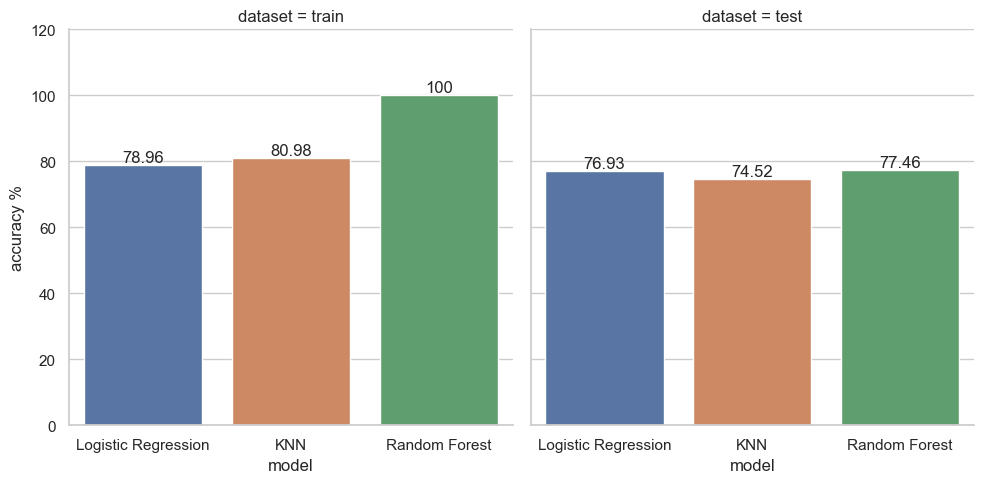

In [94]:
data = df_metrics_clf.reset_index()

g= sns.catplot(data = data ,x= 'model', y='accuracy %', kind= 'bar', col= 'dataset')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()


After comparing with Regression models, its clear that we would get better results from Classification!